In [37]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns

drivers = pd.read_csv('../data/drivers.csv')
races = pd.read_csv('../data/races.csv')
results = pd.read_csv('../data/results.csv')
circuits = pd.read_csv('../data/circuits.csv')
status = pd.read_csv('../data/status.csv')
constructors = pd.read_csv('../data/constructors.csv')
weather = pd.read_csv('../data/weather.csv')


constructors_renamed = constructors.rename(columns={'name': 'constructorName'})

df = (
    results
    .merge(drivers, on='driverId')
    .merge(races, on='raceId')
    .merge(circuits, on='circuitId')
    .merge(status[['statusId', 'status']], on='statusId')
    .merge(constructors_renamed[['constructorId', 'constructorName', 'constructorRef', 'nationality']], on='constructorId')
    .merge(weather[['raceId', 'weather']], on='raceId')
)



In [38]:
df.head()

,resultId,raceId,driverId,constructorId,number_x,grid,position,positionText,positionOrder,points,laps,time_x,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driverRef,number_y,code,forename,surname,dob,nationality_x,url_x,year,round,circuitId,name_x,date,time_y,url_y,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time,circuitRef,name_y,location,country,lat,lng,alt,url,status,constructorName,constructorRef,nationality_y,weather
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Finished,McLaren,mclaren,British,"Clear, dry, air temperature of 39 °C (102 °F)."
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Finished,BMW Sauber,bmw_sauber,German,"Clear, dry, air temperature of 39 °C (102 °F)."
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Finished,Williams,williams,British,"Clear, dry, air temperature of 39 °C (102 °F)."
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Finished,Renault,renault,French,"Clear, dry, air temperature of 39 °C (102 °F)."
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,Finished,McLaren,mclaren,British,"Clear, dry, air temperature of 39 °C (102 °F)."


In [39]:
pd.set_option('display.max_columns', None)
print(df.columns)

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number_x', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time_x',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'driverRef', 'number_y', 'code',
       'forename', 'surname', 'dob', 'nationality_x', 'url_x', 'year', 'round',
       'circuitId', 'name_x', 'date', 'time_y', 'url_y', 'fp1_date',
       'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time', 'circuitRef',
       'name_y', 'location', 'country', 'lat', 'lng', 'alt', 'url', 'status',
       'constructorName', 'constructorRef', 'nationality_y', 'weather'],
      dtype='object')


In [40]:
def clean_weather_entry(entry):
    if pd.isna(entry):
        return None
    entry = entry.replace('\xa0', ' ')
    entry = re.sub(r'\[\d+\]', '', entry)
    entry = entry.strip()
    return entry

def simplify_weather(entry):
    if entry is None:
        return None
    entry_lower = entry.lower()
    if 'sunny' in entry_lower:
        return 'Sunny'
    elif 'cloud' in entry_lower:
        return 'Cloudy'
    elif 'rain' in entry_lower or 'drizzle' in entry_lower:
        return 'Rain'
    elif 'dry' in entry_lower and 'wet' not in entry_lower:
        return 'Dry'
    elif 'wet' in entry_lower:
        return 'Wet'
    elif 'hot' in entry_lower or 'temperature of 39' in entry_lower:
        return 'Hot'
    elif 'cold' in entry_lower:
        return 'Cold'
    elif 'fine' in entry_lower:
        return 'Fine'
    elif 'clear' in entry_lower:
        return 'Clear'
    else:
        return 'Other'


df['weather'] = df['weather'].apply(clean_weather_entry)

df['weather_category'] = df['weather'].apply(simplify_weather)


In [41]:
df['weather_category'].unique()

array(['Dry', 'Sunny', 'Wet', 'Hot', 'Rain', 'Cloudy', 'Clear', 'Other',
       'Fine', 'Cold'], dtype=object)

In [42]:
print(df.shape)
print(df['weather'].isnull().sum())

(26759, 57)
0


In [43]:
null_weather_raceIds = df.loc[df['weather'].isnull(), 'raceId'].unique()

print(null_weather_raceIds)
print(f"Total de raceId com weather nulo: {len(null_weather_raceIds)}")

[]
Total de raceId com weather nulo: 0


In [44]:
weather_mapping = {
    'Dry': 'Dry',
    'Sunny': 'Dry',
    'Fine': 'Dry',
    'Hot': 'Dry',
    'Wet': 'Wet',
    'Rain': 'Rain',
    'Cloudy': 'Cloudy',
    'Cold': 'Cloudy',
    'Clear': 'Dry',
    'Other': 'Unknown'
}


df['weather_category'] = df['weather_category'].map(weather_mapping)

In [45]:
print(df['weather_category'].value_counts())


weather_category
Dry        17821
Cloudy      4802
Rain        1817
Wet         1342
Unknown      977
Name: count, dtype: int64


In [46]:
df.columns

Index(['resultId', 'raceId', 'driverId', 'constructorId', 'number_x', 'grid',
       'position', 'positionText', 'positionOrder', 'points', 'laps', 'time_x',
       'milliseconds', 'fastestLap', 'rank', 'fastestLapTime',
       'fastestLapSpeed', 'statusId', 'driverRef', 'number_y', 'code',
       'forename', 'surname', 'dob', 'nationality_x', 'url_x', 'year', 'round',
       'circuitId', 'name_x', 'date', 'time_y', 'url_y', 'fp1_date',
       'fp1_time', 'fp2_date', 'fp2_time', 'fp3_date', 'fp3_time',
       'quali_date', 'quali_time', 'sprint_date', 'sprint_time', 'circuitRef',
       'name_y', 'location', 'country', 'lat', 'lng', 'alt', 'url', 'status',
       'constructorName', 'constructorRef', 'nationality_y', 'weather',
       'weather_category'],
      dtype='object')

In [47]:
cols_to_keep = ['year', 'circuitId', 'constructorId', 'driverId', 'grid', 'positionOrder', 'points', 'weather_category', 'raceId', 'alt']
df_reduced = df[cols_to_keep].copy()


In [48]:
df_reduced

,year,circuitId,constructorId,driverId,grid,positionOrder,points,weather_category,raceId,alt
0,2008,1,1,1,1,1,10.0,Dry,18,10
1,2008,1,2,2,5,2,8.0,Dry,18,10
2,2008,1,3,3,7,3,6.0,Dry,18,10
3,2008,1,4,4,11,4,5.0,Dry,18,10
4,2008,1,1,5,3,5,4.0,Dry,18,10
...,...,...,...,...,...,...,...,...,...,...
26754,2024,24,210,825,14,16,0.0,Dry,1144,3
26755,2024,24,215,859,12,17,0.0,Dry,1144,3
26756,2024,24,15,822,9,18,0.0,Dry,1144,3
26757,2024,24,3,861,20,19,0.0,Dry,1144,3


In [49]:
df_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26759 entries, 0 to 26758
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              26759 non-null  int64  
 1   circuitId         26759 non-null  int64  
 2   constructorId     26759 non-null  int64  
 3   driverId          26759 non-null  int64  
 4   grid              26759 non-null  int64  
 5   positionOrder     26759 non-null  int64  
 6   points            26759 non-null  float64
 7   weather_category  26759 non-null  object 
 8   raceId            26759 non-null  int64  
 9   alt               26759 non-null  int64  
dtypes: float64(1), int64(8), object(1)
memory usage: 2.0+ MB


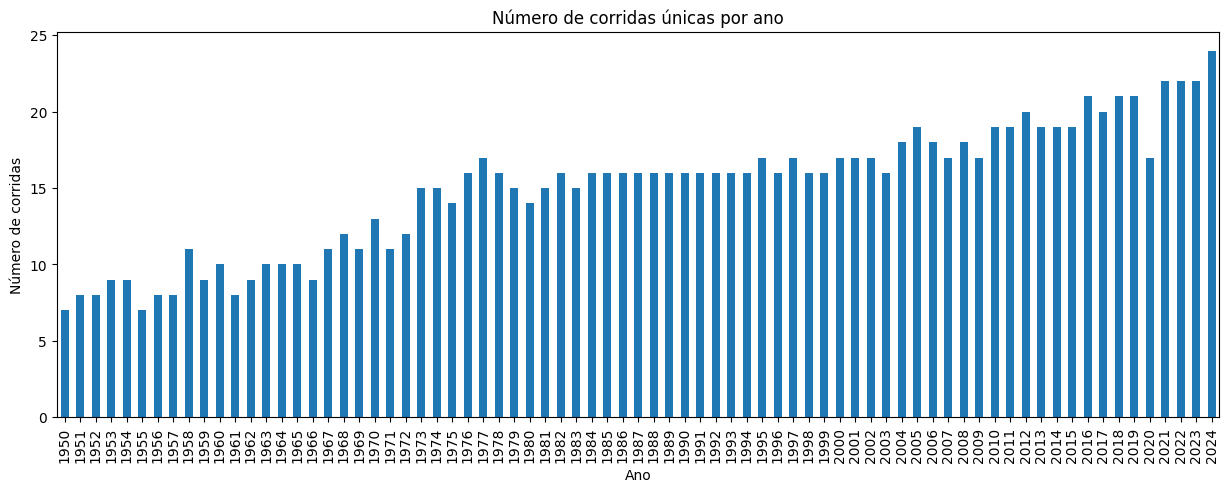

In [50]:
# Numeros de Corrida por Ano
corridas_por_ano = df_reduced.groupby('year')['raceId'].nunique()

corridas_por_ano.plot(kind='bar', figsize=(15,5))
plt.title('Número de corridas únicas por ano')
plt.xlabel('Ano')
plt.ylabel('Número de corridas')
plt.show()

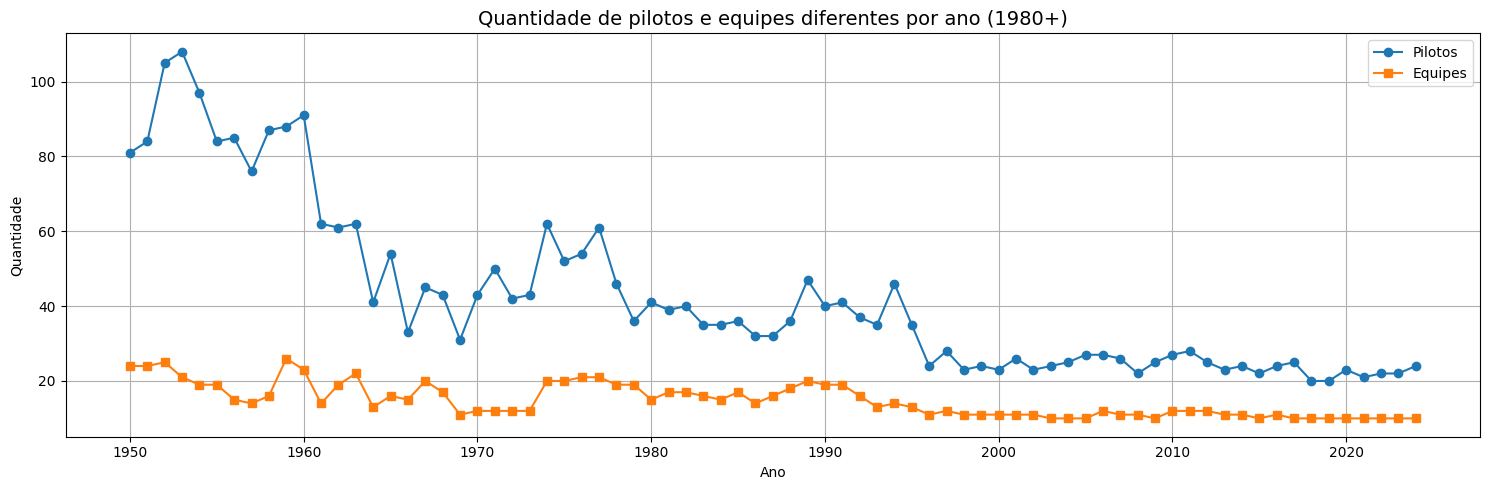

In [51]:
pilotos_por_ano = df_reduced.groupby('year')['driverId'].nunique()
equipes_por_ano = df_reduced.groupby('year')['constructorId'].nunique()

plt.figure(figsize=(15,5))
pilotos_por_ano.plot(label='Pilotos', marker='o')
equipes_por_ano.plot(label='Equipes', marker='s')
plt.title('Quantidade de pilotos e equipes diferentes por ano (1980+)', fontsize=14)
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()




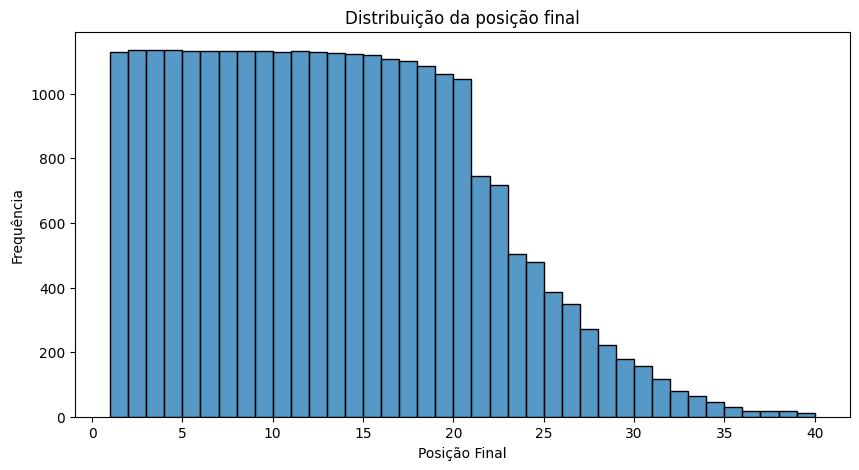

In [52]:
plt.figure(figsize=(10,5))
sns.histplot(df_reduced['positionOrder'], bins=range(1, max(df_reduced['positionOrder'])+2), kde=False)
plt.title('Distribuição da posição final')
plt.xlabel('Posição Final')
plt.ylabel('Frequência')
plt.show()


In [53]:
df_reduced['positionOrder'].describe()


count    26759.000000
mean        12.794051
std          7.665951
min          1.000000
25%          6.000000
50%         12.000000
75%         18.000000
max         39.000000
Name: positionOrder, dtype: float64

In [54]:
df_reduced[df_reduced['positionOrder'] > 30]['year'].value_counts()


year
1989    140
1990     62
1991     59
1977     17
1988     15
1961     14
1992     12
1974     10
1952     10
1982      7
1953      7
1978      6
1954      6
1981      4
1958      4
1959      3
1963      3
1960      3
1955      3
1956      3
1951      3
1957      3
1950      3
1962      2
1965      1
1972      1
Name: count, dtype: int64

<Axes: ylabel='positionOrder'>

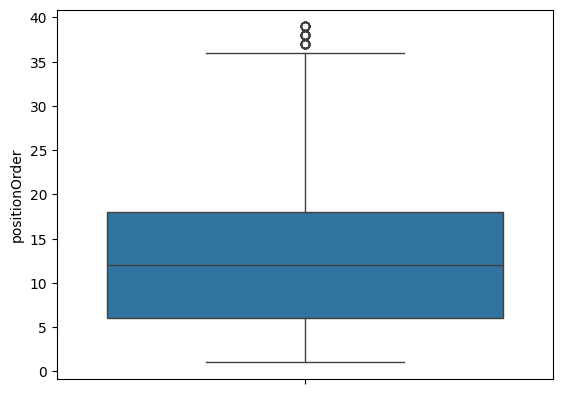

In [55]:
sns.boxplot(data=df_reduced, y='positionOrder')

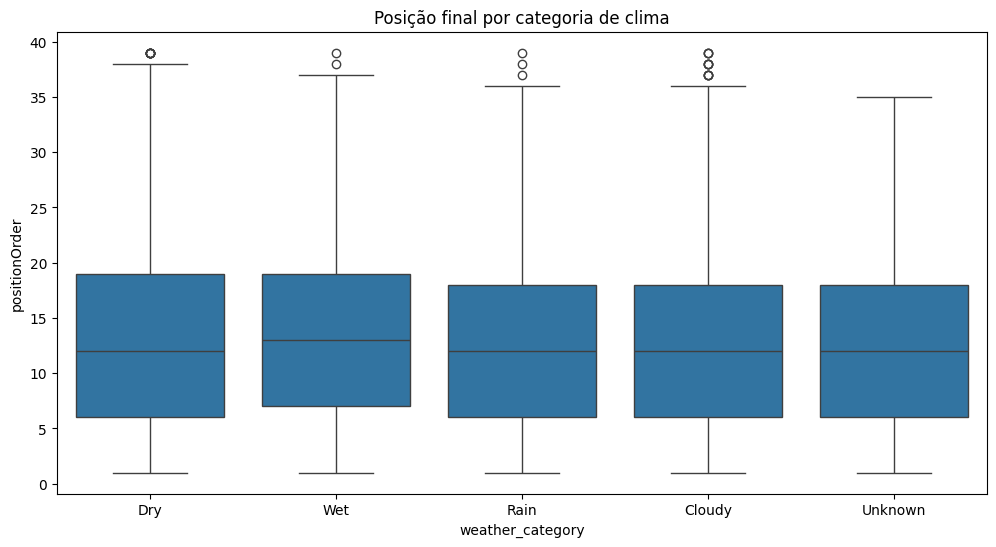

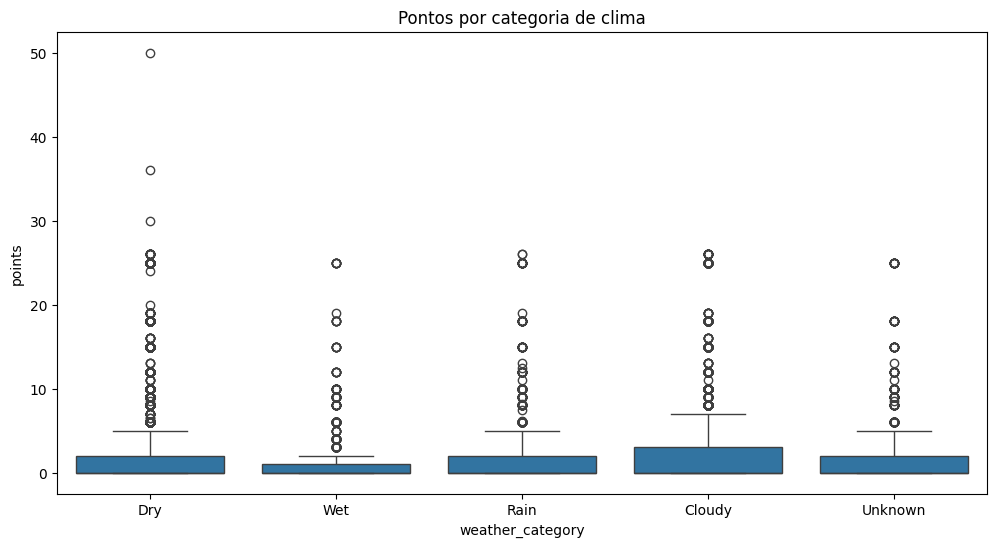

In [56]:
plt.figure(figsize=(12,6))
sns.boxplot(x='weather_category', y='positionOrder', data=df_reduced)
plt.title('Posição final por categoria de clima')
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(x='weather_category', y='points', data=df_reduced)
plt.title('Pontos por categoria de clima')
plt.show()


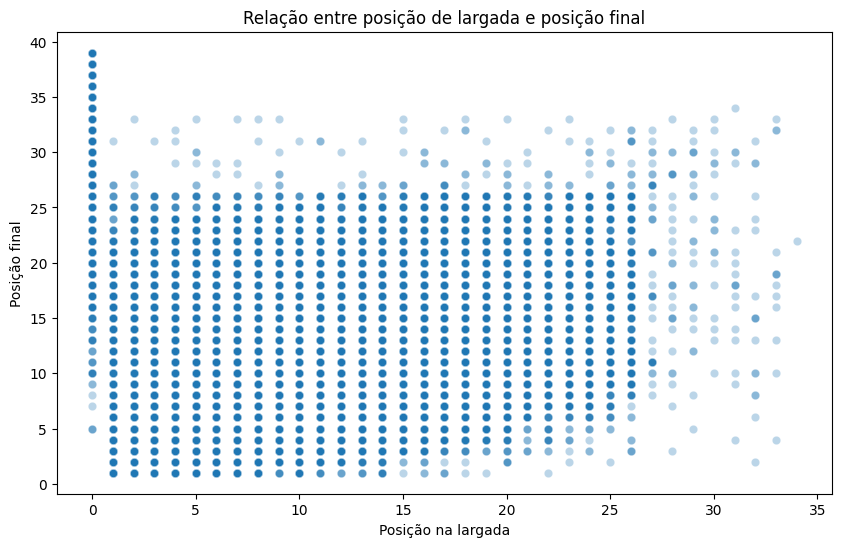

In [57]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='grid', y='positionOrder', data=df_reduced, alpha=0.3)
plt.title('Relação entre posição de largada e posição final')
plt.xlabel('Posição na largada')
plt.ylabel('Posição final')
plt.show()


In [58]:
df_filtered = df_reduced[(df_reduced['year'] >= 1980) & (df_reduced['positionOrder'] <= 30)]

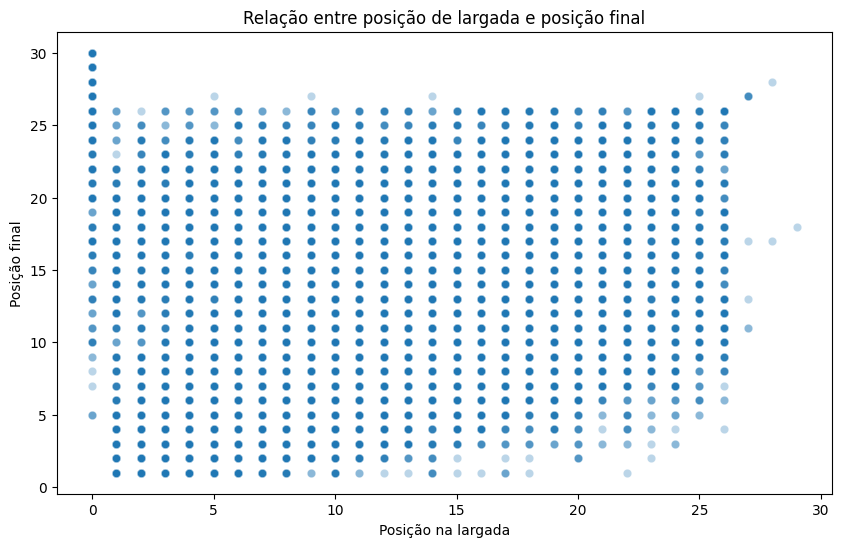

In [59]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='grid', y='positionOrder', data=df_filtered, alpha=0.3)
plt.title('Relação entre posição de largada e posição final')
plt.xlabel('Posição na largada')
plt.ylabel('Posição final')
plt.show()


In [60]:
media_posicao_por_grid = df_filtered.groupby('grid')['positionOrder'].mean()
print(media_posicao_por_grid.head(20))


grid
0     26.090028
1      5.112923
2      6.089308
3      6.899624
4      7.849435
5      8.988708
6      9.309912
7     10.126725
8     10.835634
9     10.794486
10    11.653216
11    12.050251
12    12.455919
13    13.005025
14    13.603015
15    13.829975
16    14.073232
17    14.375469
18    15.041825
19    15.057545
Name: positionOrder, dtype: float64


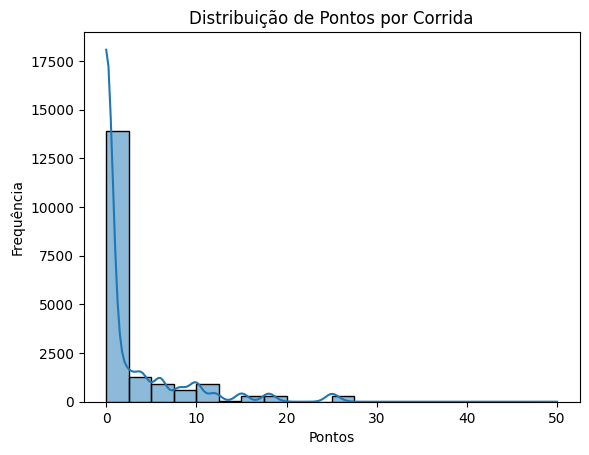

In [61]:
sns.histplot(df_filtered['points'], bins=20, kde=True)
plt.title('Distribuição de Pontos por Corrida')
plt.xlabel('Pontos')
plt.ylabel('Frequência')
plt.show()


In [62]:
df_filtered['points'].value_counts().sort_index()


points
0.0     12293
0.5         4
1.0       790
1.5         3
2.0       794
2.5         1
3.0       495
4.0       791
4.5         1
5.0       129
6.0       784
7.0         8
7.5         1
8.0       420
9.0       178
10.0      613
11.0        8
12.0      293
12.5        1
13.0       11
15.0      291
16.0       13
18.0      280
19.0       23
20.0        1
24.0        1
25.0      266
26.0       37
30.0        1
36.0        1
50.0        1
Name: count, dtype: int64

In [63]:
df_filtered['points'].describe()


count    18533.000000
mean         2.434927
std          4.958614
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         50.000000
Name: points, dtype: float64

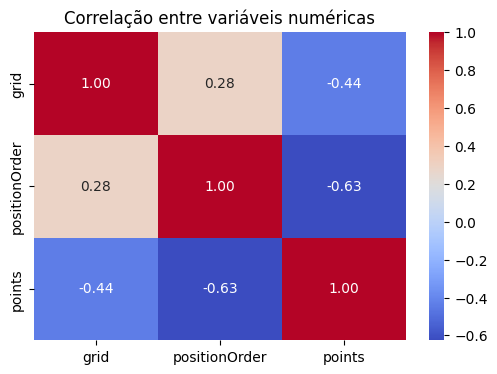

In [64]:
cols = ['grid', 'positionOrder', 'points']
corr = df_filtered[cols].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlação entre variáveis numéricas')
plt.show()


In [65]:
df_filtered.drop(columns=['points'], inplace=True)

C:\Users\arthu\AppData\Local\Temp\ipykernel_4928\4037876434.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.drop(columns=['points'], inplace=True)


In [66]:
media_por_equipe = df_filtered.groupby('constructorId')['positionOrder'].mean().sort_values()
print(media_por_equipe.head(10))

constructorId
23      4.882353
131     5.909836
9       7.347716
6       8.089477
2       8.921429
1       9.103145
22     10.163462
211    10.631579
4      10.838753
3      10.986259
Name: positionOrder, dtype: float64


In [67]:
media_por_piloto = df_filtered.groupby('driverId')['positionOrder'].mean().sort_values()
print(media_por_piloto.head(10))


driverId
1      5.019663
830    5.645933
30     6.879870
199    6.967742
20     7.093333
117    7.504950
844    7.557047
846    7.851562
857    7.891304
3      8.252427
Name: positionOrder, dtype: float64


In [68]:
df_filtered.groupby('weather_category')['positionOrder'].mean().sort_values()

weather_category
Cloudy     11.683092
Rain       12.385355
Dry        12.572045
Unknown    12.704180
Wet        13.207547
Name: positionOrder, dtype: float64

In [69]:
df_encode = pd.get_dummies(df_filtered, columns=['weather_category'], prefix='weather')



In [70]:


global_mean = df_encode['positionOrder'].mean()

def target_encode_smooth(df, col, target, alpha=10):
    agg = df.groupby(col)[target].agg(['mean', 'count'])
    smooth = (agg['mean'] * agg['count'] + global_mean * alpha) / (agg['count'] + alpha)
    return df[col].map(smooth)

df_encode['driver_encoded'] = target_encode_smooth(df_encode, 'driverId', 'positionOrder')
df_encode['constructor_encoded'] = target_encode_smooth(df_encode, 'constructorId', 'positionOrder')

df_encode

,year,circuitId,constructorId,driverId,grid,positionOrder,raceId,alt,weather_Cloudy,weather_Dry,weather_Rain,weather_Unknown,weather_Wet,driver_encoded,constructor_encoded
0,2008,1,1,1,1,1,18,10,False,True,False,False,False,5.221217,9.123728
1,2008,1,2,2,5,2,18,10,False,True,False,False,False,10.809100,9.153102
2,2008,1,3,3,7,3,18,10,False,True,False,False,False,8.444284,10.995013
3,2008,1,4,4,11,4,18,10,False,True,False,False,False,8.586873,10.859579
4,2008,1,1,5,3,5,18,10,False,True,False,False,False,13.212831,9.123728
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26754,2024,24,210,825,14,16,1144,3,False,True,False,False,False,13.510027,14.176834
26755,2024,24,215,859,12,17,1144,3,False,True,False,False,False,12.665017,13.137334
26756,2024,24,15,822,9,18,1144,3,False,True,False,False,False,9.101033,13.051907
26757,2024,24,3,861,20,19,1144,3,False,True,False,False,False,12.945545,10.995013


In [71]:
df_filtered = df_filtered.sort_values(['driverId', 'year', 'circuitId'])
df_filtered['driver_race_count'] = df_filtered.groupby('driverId').cumcount()

df_filtered['is_win'] = (df['positionOrder'] == 1).astype(int)
df_filtered['driver_win_count'] = df_filtered.groupby('driverId')['is_win'].cumsum().shift(1).fillna(0)
df_filtered['constructor_race_count'] = df_filtered.groupby('constructorId').cumcount()
df_filtered['constructor_win_count'] = df_filtered.groupby('constructorId')['is_win'].cumsum().shift(1).fillna(0)
first_year = df_filtered.groupby('driverId')['year'].transform('min')
df_filtered['years_since_debut'] = df['year'] - first_year
df_filtered.drop(columns=['is_win'], inplace=True)


df_filtered = df_filtered.sort_values(by=['driverId', 'raceId'])

df_filtered['recent_form'] = (
    df_filtered.groupby('driverId')['positionOrder']
    .transform(lambda x: x.shift(1).rolling(window=3, min_periods=1).mean())
)


df_filtered['recent_form'] = df_filtered['recent_form'].fillna(df_filtered['recent_form'].mean())




In [72]:
df_filtered.to_csv("dados_tratados.csv", index=False)

## Anotações sobre a EDA 🧪

#### Redução de colunas:
mantivemos apenas year, circuitId, constructorId, driverId, grid, positionOrder e weather_category. A coluna points foi excluída para evitar vazamento de informação no modelo.

#### Simplificação do clima:
transformamos a variável weather em uma nova coluna chamada weather_category, agrupando categorias semelhantes (como “Dry”, “Sunny”, “Fine”) e mantendo uma categoria Unknown para casos indefinidos.

#### Filtragem de dados: 
restringimos a análise para anos a partir de 1980 e excluímos corridas com positionOrder maior que 30.

#### Codificação:

weather_category: transformada com One-Hot Encoding.

driverId e constructorId: aplicamos Target Encoding com base na média de positionOrder.